## Accuracy Results
#### Case1:
d=6, angle=0
- svm: 64
- random forest: 53
- knn: 65

#### Case2:
d=6, angle=-np.pi/6
- svm: 66
- random forest: 52
- knn: 69

In [62]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline  
import glob
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage import exposure
import utilities as util
from skimage.feature import greycomatrix, greycoprops

Females handwritten samples


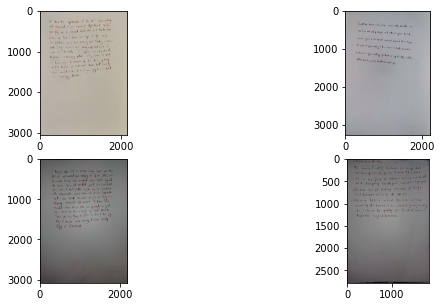

Males handwritten samples


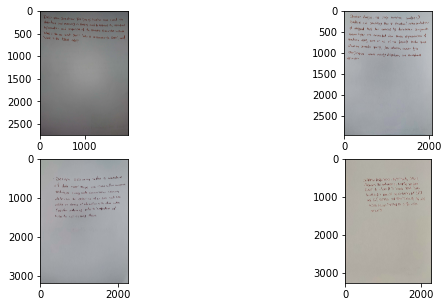

In [61]:
# Read the test images
female_imgs = util.read_imgs('../data/Female/Female')
male_imgs = util.read_imgs('../data/Male/Male')

# Preview 9 samples
print('Females handwritten samples')
util.draw_grid(figsize=(10,5), rows=2, cols=2, imgs=female_imgs[:4])
print('Males handwritten samples')
util.draw_grid(figsize=(10,5), rows=2, cols=2, imgs=male_imgs[:4])

In [105]:
'''
Extracts the glcm statistical features.

params:
-------
img        np.array   rgb image to extract its features
distance   int        distance between the 2 pixels in the glcm matrix
angle      float      angle between the 2 pixels in the glcm matrix
verbose    boolean    visualize the values being extracted. By default: False
'''
def extract_glcm_features(img, distance=6, angle=-np.pi/9, verbose=False):
    img = (rgb2gray(img)*255).astype(np.uint8)
    glcm = greycomatrix(img, [distance], [angle], levels=256, normed=True, symmetric=True)
    contrast = greycoprops(glcm, 'contrast')[0][0]
    dissimilarity = greycoprops(glcm, 'dissimilarity')[0][0]
    homogeneity = greycoprops(glcm, 'homogeneity')[0][0]
    ASM = greycoprops(glcm, 'ASM')[0][0]
    energy = greycoprops(glcm, 'energy')[0][0]
    correlation = greycoprops(glcm, 'correlation')[0][0]

    if(verbose):
        print(contrast)
        print('---------')
        print(dissimilarity)
        print('---------')
        print(homogeneity)
        print('---------')
        print(ASM)
        print('---------')
        print(energy)
        print('---------')
        print(correlation)
        print('---------')
    glcm_features = [contrast, dissimilarity, homogeneity, ASM, energy, correlation]
    return glcm_features


In [141]:
females_count = len(female_imgs) 
males_count = len(male_imgs)

X = []
y = []
# Calculating features for females' images
for i in range(females_count):
    # Extract glcm features
    glcm_features = extract_glcm_features(female_imgs[i], distance=6, angle=-np.pi/9)
    X.append(glcm_features)
    y.append(1)
    
# Calculating features for males' images
for i in range(males_count):
    # Extract glcm features
    glcm_features = extract_glcm_features(male_imgs[i], distance=6, angle=-np.pi/9)
    X.append(glcm_features)
    y.append(0)
    

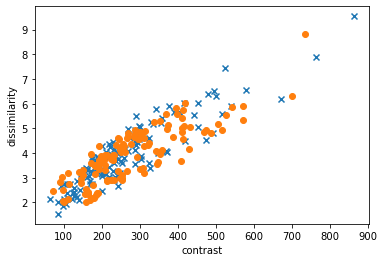

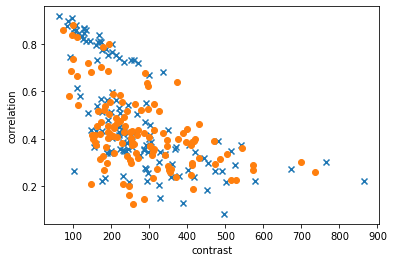

In [116]:
df = pd.DataFrame(X, columns = ['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy', 'correlation'])
df['gender'] = y

male_mask = df['gender'] == 0
female_mask = df['gender'] == 1

plt.scatter(df[female_mask]['contrast'], df[female_mask]['dissimilarity'], marker = "x")
plt.scatter(df[male_mask]['contrast'], df[male_mask]['dissimilarity'], marker = "o")
plt.xlabel('contrast')
plt.ylabel('dissimilarity')
plt.show()

plt.scatter(df[female_mask]['contrast'], df[female_mask]['correlation'], marker = "x")
plt.scatter(df[male_mask]['contrast'], df[male_mask]['correlation'], marker = "o")
plt.xlabel('contrast')
plt.ylabel('correlation')
plt.show()

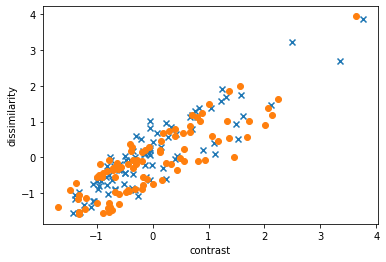

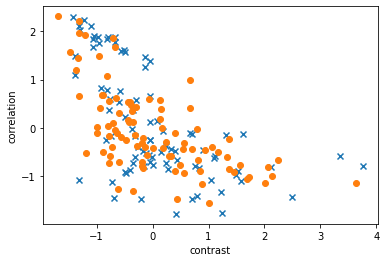

In [132]:
# performing preprocessing part
# Standardize features by removing the mean and scaling to unit variance 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Spliting data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) 
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Plotting features accorss each other after standard scalling
female_mask = y_train == 1
male_mask = y_train == 0

plt.scatter(X_train[female_mask][:,0], X_train[female_mask][:,1], marker = "x")
plt.scatter(X_train[male_mask][:,0], X_train[male_mask][:,1], marker = "o")
plt.xlabel('contrast')
plt.ylabel('dissimilarity')
plt.show()

plt.scatter(X_train[female_mask][:,0], X_train[female_mask][:,-1], marker = "x")
plt.scatter(X_train[male_mask][:,0], X_train[male_mask][:,-1], marker = "o")
plt.xlabel('contrast')
plt.ylabel('correlation')
plt.show()

In [69]:
# # Applying PCA function on training
# # and testing set of X component
# from sklearn.decomposition import PCA

# pca = PCA(n_components = 3)
 
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
 
# explained_variance = pca.explained_variance_ratio_
# print(np.sum(explained_variance))

0.9667720622773736


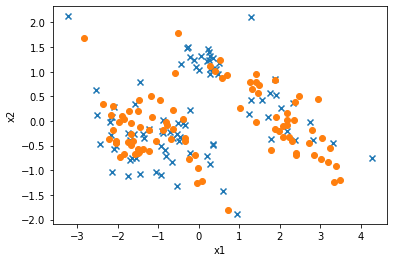

In [70]:
plt.scatter(X_train[female_mask][:,0], X_train[female_mask][:,-1], marker = "x", label="female")
plt.scatter(X_train[male_mask][:,0], X_train[male_mask][:,-1], marker = "o", label="male")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [142]:
from sklearn import svm

clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [155]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5128205128205128


In [144]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6923076923076923
